In [101]:
# !pip install --upgrade pip --user
# !pip install -r requirements --user

# Importação dos Dados

In [312]:
import pandas as pd
import numpy as np
import plotly.express as px
from datetime import datetime, date, timedelta
import matplotlib.pyplot as plt

In [360]:
X_train = pd.read_csv("Dados/final_Xtrain.csv", parse_dates=["datehour"]).set_index("datehour").asfreq("H")

In [361]:
X_test = pd.read_csv("Dados/final_Xtest.csv", parse_dates=["datehour"]).set_index("datehour").asfreq("H")

In [362]:
y_train = pd.read_csv("Dados/final_Ytrain.csv", parse_dates=["datehour"]).set_index("datehour").asfreq("H")["total"]

In [363]:
y_test = pd.read_csv("Dados/final_Ytest.csv", parse_dates=["datehour"]).set_index("datehour").asfreq("H")["total"]

In [364]:
X_train.tail()

isholiday  isnearholiday  isweekend    ma_total  TAVG  \
datehour                                                                     
2018-12-31 19:00:00      False           True      False  952.965278  42.0   
2018-12-31 20:00:00      False           True      False  952.493056  42.0   
2018-12-31 21:00:00      False           True      False  951.855556  42.0   
2018-12-31 22:00:00      False           True      False  951.254167  42.0   
2018-12-31 23:00:00      False           True      False  950.820833  42.0   

                     TMAX  TMIN  PRCP  SNOW  SNWD  ...  sin(360,freq=A-DEC)  \
datehour                                           ...                        
2018-12-31 19:00:00  48.0  36.0  1.02   0.0   0.0  ...            -0.961130   
2018-12-31 20:00:00  48.0  36.0  1.02   0.0   0.0  ...            -0.858764   
2018-12-31 21:00:00  48.0  36.0  1.02   0.0   0.0  ...            -0.699458   
2018-12-31 22:00:00  48.0  36.0  1.02   0.0   0.0  ...            -0.493776   
2018-12-31 23:00:00  48.0  36.0  1.02   0.0   0.0  ...            -0.255353   

                     cos(360,freq=A-DEC)  sin(361,freq=A-DEC)  \
datehour                                                        
2018-12-31 19:00:00             0.276097            -0.962114   
2018-12-31 20:00:00             0.512371            -0.860230   
2018-12-31 21:00:00             0.714673            -0.700995   
2018-12-31 22:00:00             0.869589            -0.495022   
2018-12-31 23:00:00             0.966848            -0.256047   

                     cos(361,freq=A-DEC)  sin(362,freq=A-DEC)  \
datehour                                                        
2018-12-31 19:00:00             0.272648            -0.963085   
2018-12-31 20:00:00             0.509905            -0.861690   
2018-12-31 21:00:00             0.713167            -0.702527   
2018-12-31 22:00:00             0.868880            -0.496268   
2018-12-31 23:00:00             0.966664            -0.256740   

                     cos(362,freq=A-DEC)  sin(363,freq=A-DEC)  \
datehour                                                        
2018-12-31 19:00:00             0.269196            -0.964045   
2018-12-31 20:00:00             0.507435            -0.863142   
2018-12-31 21:00:00             0.711657            -0.704057   
2018-12-31 22:00:00             0.868169            -0.497513   
2018-12-31 23:00:00             0.966481            -0.257433   

                     cos(363,freq=A-DEC)  sin(364,freq=A-DEC)  \
datehour                                                        
2018-12-31 19:00:00             0.265741            -0.964991   
2018-12-31 20:00:00             0.504961            -0.864587   
2018-12-31 21:00:00             0.710143            -0.705584   
2018-12-31 22:00:00             0.867456            -0.498757   
2018-12-31 23:00:00             0.966296            -0.258126   

                     cos(364,freq=A-DEC)  
datehour                                  
2018-12-31 19:00:00             0.262281  
2018-12-31 20:00:00             0.502483  
2018-12-31 21:00:00             0.708627  
2018-12-31 22:00:00             0.866742  
2018-12-31 23:00:00             0.966111  

[5 rows x 775 columns]

In [365]:
X_test.tail()

isholiday  isnearholiday  isweekend    ma_total  TAVG  \
datehour                                                                     
2019-12-31 19:00:00      False          False      False  916.395833  40.5   
2019-12-31 20:00:00      False          False      False  916.802778  40.5   
2019-12-31 21:00:00      False          False      False  917.043056  40.5   
2019-12-31 22:00:00      False          False      False  917.318056  40.5   
2019-12-31 23:00:00      False          False      False  917.547222  40.5   

                     TMAX  TMIN  PRCP  SNOW  SNWD  ...  sin(360,freq=A-DEC)  \
datehour                                           ...                        
2019-12-31 19:00:00  45.0  36.0  0.02   0.0   0.0  ...            -0.961130   
2019-12-31 20:00:00  45.0  36.0  0.02   0.0   0.0  ...            -0.858764   
2019-12-31 21:00:00  45.0  36.0  0.02   0.0   0.0  ...            -0.699458   
2019-12-31 22:00:00  45.0  36.0  0.02   0.0   0.0  ...            -0.493776   
2019-12-31 23:00:00  45.0  36.0  0.02   0.0   0.0  ...            -0.255353   

                     cos(360,freq=A-DEC)  sin(361,freq=A-DEC)  \
datehour                                                        
2019-12-31 19:00:00             0.276097            -0.962114   
2019-12-31 20:00:00             0.512371            -0.860230   
2019-12-31 21:00:00             0.714673            -0.700995   
2019-12-31 22:00:00             0.869589            -0.495022   
2019-12-31 23:00:00             0.966848            -0.256047   

                     cos(361,freq=A-DEC)  sin(362,freq=A-DEC)  \
datehour                                                        
2019-12-31 19:00:00             0.272648            -0.963085   
2019-12-31 20:00:00             0.509905            -0.861690   
2019-12-31 21:00:00             0.713167            -0.702527   
2019-12-31 22:00:00             0.868880            -0.496268   
2019-12-31 23:00:00             0.966664            -0.256740   

                     cos(362,freq=A-DEC)  sin(363,freq=A-DEC)  \
datehour                                                        
2019-12-31 19:00:00             0.269196            -0.964045   
2019-12-31 20:00:00             0.507435            -0.863142   
2019-12-31 21:00:00             0.711657            -0.704057   
2019-12-31 22:00:00             0.868169            -0.497513   
2019-12-31 23:00:00             0.966481            -0.257433   

                     cos(363,freq=A-DEC)  sin(364,freq=A-DEC)  \
datehour                                                        
2019-12-31 19:00:00             0.265741            -0.964991   
2019-12-31 20:00:00             0.504961            -0.864587   
2019-12-31 21:00:00             0.710143            -0.705584   
2019-12-31 22:00:00             0.867456            -0.498757   
2019-12-31 23:00:00             0.966296            -0.258126   

                     cos(364,freq=A-DEC)  
datehour                                  
2019-12-31 19:00:00             0.262281  
2019-12-31 20:00:00             0.502483  
2019-12-31 21:00:00             0.708627  
2019-12-31 22:00:00             0.866742  
2019-12-31 23:00:00             0.966111  

[5 rows x 775 columns]

In [366]:
y_train.tail()

datehour
2018-12-31 19:00:00    102.0
2018-12-31 20:00:00    133.0
2018-12-31 21:00:00     61.0
2018-12-31 22:00:00     73.0
2018-12-31 23:00:00     48.0
Freq: H, Name: total, dtype: float64

In [367]:
y_test.tail()

datehour
2019-12-31 19:00:00    782.0
2019-12-31 20:00:00    505.0
2019-12-31 21:00:00    386.0
2019-12-31 22:00:00    390.0
2019-12-31 23:00:00    291.0
Freq: H, Name: total, dtype: float64

In [368]:
px.line(
    pd.DataFrame({
        "train": y_train,
        "test": y_test
    })
)

## Usar Apenas Dados Fourier

In [346]:
# X_train = X_train.iloc[:,10:]
# X_test = X_test.iloc[:,10:]

## Remover Alguma Frequência de Fourier

Podemos remover nos testes alguma das frequências.

In [369]:
# remoção de frequencia anual
X_train = X_train.loc[:,~X_train.columns.str.contains("freq=A")]
X_test = X_test.loc[:,~X_test.columns.str.contains("freq=A")]

## Removendo Moving Average

Interessante de ver como o moving average é importante para deixar de ser linear!

In [370]:
# testando remover ma total
X_train = X_train.drop(columns=["ma_total"])
X_test = X_test.drop(columns=["ma_total"])

In [371]:
X_train.head() 

isholiday  isnearholiday  isweekend  TAVG  TMAX  TMIN  \
datehour                                                                     
2017-01-01 00:00:00      False           True       True  44.0  48.0  40.0   
2017-01-01 01:00:00      False           True       True  44.0  48.0  40.0   
2017-01-01 02:00:00      False           True       True  44.0  48.0  40.0   
2017-01-01 03:00:00      False           True       True  44.0  48.0  40.0   
2017-01-01 04:00:00      False           True       True  44.0  48.0  40.0   

                     PRCP  SNOW  SNWD  const  ...  sin(360,freq=A-DEC)  \
datehour                                      ...                        
2017-01-01 00:00:00   0.0   0.0   0.0    1.0  ...             0.000000   
2017-01-01 01:00:00   0.0   0.0   0.0    1.0  ...             0.255353   
2017-01-01 02:00:00   0.0   0.0   0.0    1.0  ...             0.493776   
2017-01-01 03:00:00   0.0   0.0   0.0    1.0  ...             0.699458   
2017-01-01 04:00:00   0.0   0.0   0.0    1.0  ...             0.858764   

                     cos(360,freq=A-DEC)  sin(361,freq=A-DEC)  \
datehour                                                        
2017-01-01 00:00:00             1.000000             0.000000   
2017-01-01 01:00:00             0.966848             0.256047   
2017-01-01 02:00:00             0.869589             0.495022   
2017-01-01 03:00:00             0.714673             0.700995   
2017-01-01 04:00:00             0.512371             0.860230   

                     cos(361,freq=A-DEC)  sin(362,freq=A-DEC)  \
datehour                                                        
2017-01-01 00:00:00             1.000000             0.000000   
2017-01-01 01:00:00             0.966664             0.256740   
2017-01-01 02:00:00             0.868880             0.496268   
2017-01-01 03:00:00             0.713167             0.702527   
2017-01-01 04:00:00             0.509905             0.861690   

                     cos(362,freq=A-DEC)  sin(363,freq=A-DEC)  \
datehour                                                        
2017-01-01 00:00:00             1.000000             0.000000   
2017-01-01 01:00:00             0.966481             0.257433   
2017-01-01 02:00:00             0.868169             0.497513   
2017-01-01 03:00:00             0.711657             0.704057   
2017-01-01 04:00:00             0.507435             0.863142   

                     cos(363,freq=A-DEC)  sin(364,freq=A-DEC)  \
datehour                                                        
2017-01-01 00:00:00             1.000000             0.000000   
2017-01-01 01:00:00             0.966296             0.258126   
2017-01-01 02:00:00             0.867456             0.498757   
2017-01-01 03:00:00             0.710143             0.705584   
2017-01-01 04:00:00             0.504961             0.864587   

                     cos(364,freq=A-DEC)  
datehour                                  
2017-01-01 00:00:00             1.000000  
2017-01-01 01:00:00             0.966111  
2017-01-01 02:00:00             0.866742  
2017-01-01 03:00:00             0.708627  
2017-01-01 04:00:00             0.502483  

[5 rows x 774 columns]

In [372]:
X_test.head() 

isholiday  isnearholiday  isweekend  TAVG  TMAX  TMIN  \
datehour                                                                     
2019-01-01 00:00:00       True          False      False  48.5  58.0  39.0   
2019-01-01 01:00:00       True          False      False  48.5  58.0  39.0   
2019-01-01 02:00:00       True          False      False  48.5  58.0  39.0   
2019-01-01 03:00:00       True          False      False  48.5  58.0  39.0   
2019-01-01 04:00:00       True          False      False  48.5  58.0  39.0   

                     PRCP  SNOW  SNWD  const  ...  sin(360,freq=A-DEC)  \
datehour                                      ...                        
2019-01-01 00:00:00  0.06   0.0   0.0    1.0  ...             0.000000   
2019-01-01 01:00:00  0.06   0.0   0.0    1.0  ...             0.255353   
2019-01-01 02:00:00  0.06   0.0   0.0    1.0  ...             0.493776   
2019-01-01 03:00:00  0.06   0.0   0.0    1.0  ...             0.699458   
2019-01-01 04:00:00  0.06   0.0   0.0    1.0  ...             0.858764   

                     cos(360,freq=A-DEC)  sin(361,freq=A-DEC)  \
datehour                                                        
2019-01-01 00:00:00             1.000000             0.000000   
2019-01-01 01:00:00             0.966848             0.256047   
2019-01-01 02:00:00             0.869589             0.495022   
2019-01-01 03:00:00             0.714673             0.700995   
2019-01-01 04:00:00             0.512371             0.860230   

                     cos(361,freq=A-DEC)  sin(362,freq=A-DEC)  \
datehour                                                        
2019-01-01 00:00:00             1.000000             0.000000   
2019-01-01 01:00:00             0.966664             0.256740   
2019-01-01 02:00:00             0.868880             0.496268   
2019-01-01 03:00:00             0.713167             0.702527   
2019-01-01 04:00:00             0.509905             0.861690   

                     cos(362,freq=A-DEC)  sin(363,freq=A-DEC)  \
datehour                                                        
2019-01-01 00:00:00             1.000000             0.000000   
2019-01-01 01:00:00             0.966481             0.257433   
2019-01-01 02:00:00             0.868169             0.497513   
2019-01-01 03:00:00             0.711657             0.704057   
2019-01-01 04:00:00             0.507435             0.863142   

                     cos(363,freq=A-DEC)  sin(364,freq=A-DEC)  \
datehour                                                        
2019-01-01 00:00:00             1.000000             0.000000   
2019-01-01 01:00:00             0.966296             0.258126   
2019-01-01 02:00:00             0.867456             0.498757   
2019-01-01 03:00:00             0.710143             0.705584   
2019-01-01 04:00:00             0.504961             0.864587   

                     cos(364,freq=A-DEC)  
datehour                                  
2019-01-01 00:00:00             1.000000  
2019-01-01 01:00:00             0.966111  
2019-01-01 02:00:00             0.866742  
2019-01-01 03:00:00             0.708627  
2019-01-01 04:00:00             0.502483  

[5 rows x 774 columns]

# Códigos

In [373]:
# usaremos esse trecho nos graficos
window_start = 15000
window_end = window_start + 500

## Métricas

In [374]:
from sklearn import metrics
import math

def print_metrics(y_test, y_pred):
    df_diff = pd.Series(y_test - y_pred)
    mse = pd.Series(df_diff ** 2).replace(np.inf, np.nan).dropna().mean()
    rmse = math.sqrt(mse)
    mape = abs(df_diff/y_test).replace(np.inf, np.nan).dropna().mean()
    medianae = abs(df_diff).replace(np.inf, np.nan).dropna().median()
    meanae = abs(df_diff).replace(np.inf, np.nan).dropna().mean()

    print("MSE:", mse)
    print("RMSE:", rmse)
    print("MAPE:", mape)
    print("MedianAE:", medianae)
    print("MeanAE:", meanae)

# Random Forest Regressor

In [385]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
modelo = RandomForestRegressor().fit(X_train, y_train)

In [355]:
y_pred = pd.Series(modelo.predict(X_test), index=X_test.index)

In [356]:
px.line(
    pd.DataFrame({
        "pred": y_pred,
        "real": y_test
    })
)

In [357]:
print_metrics(y_test, y_pred)

MSE: 309907.20898021694
RMSE: 556.6931012507852
MAPE: 0.31473248322924113
MedianAE: 192.97
MeanAE: 355.2640993150685


In [358]:
y_test.iloc[:].rename("demanda real").plot(style='--', color='tab:orange', figsize=(7,3), legend=True)
y_pred.iloc[:].rename("predicao").plot(color='tab:blue', figsize=(7,3), legend=True)

plt.legend(loc="lower left", prop={'size': 9})
plt.savefig("Imagens/pred_random_forest_total.png")

In [359]:
y_test.iloc[3000:3500].rename("demanda real").plot(style='--', color='tab:orange', figsize=(7,3), legend=True)
y_pred.iloc[3000:3500].rename("predicao").plot(color='tab:blue', figsize=(7,3), legend=True)

plt.legend(loc="lower left", prop={'size': 9})
plt.savefig("Imagens/pred_random_forest_window.png")

# Linear Regression

In [298]:
from sklearn.linear_model import LinearRegression

In [299]:
modelo = LinearRegression(fit_intercept=False).fit(X_train, y_train)

In [300]:
y_pred = pd.Series(modelo.predict(X_test), index=X_test.index)

In [301]:
px.line(
    pd.DataFrame({
        "pred": y_pred,
        "real": y_test
    })
)

In [302]:
print_metrics(y_test, y_pred)

MSE: 751862.1278091089
RMSE: 867.0998372789081
MAPE: 1.260871593717907
MedianAE: 434.9034640962242
MeanAE: 625.1105395290898


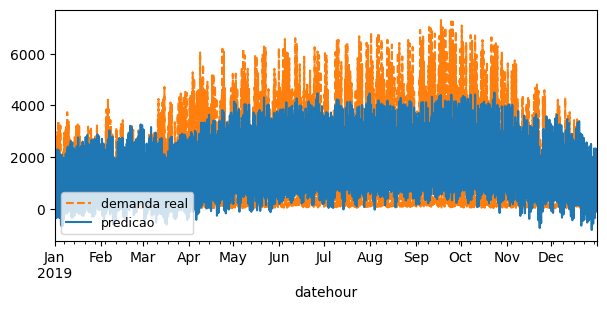

In [325]:
y_test.iloc[:].rename("demanda real").plot(style='--', color='tab:orange', figsize=(7,3), legend=True)
y_pred.iloc[:].rename("predicao").plot(color='tab:blue', figsize=(7,3), legend=True)

plt.legend(loc="lower left", prop={'size': 9})
plt.savefig("Imagens/pred_linear_regression_total.png")

In [327]:
y_test.iloc[3000:3500].rename("demanda real").plot(style='--', color='tab:orange', figsize=(7,3), legend=True)
y_pred.iloc[3000:3500].rename("predicao").plot(color='tab:blue', figsize=(7,3), legend=True)

plt.legend(loc="lower left", prop={'size': 9})
plt.savefig("Imagens/pred_linear_regression_window.png")

# XGBoost

In [377]:
import xgboost as xgb

In [378]:
split_index = int(len(X_train) * 0.7)

X_train_2 = X_train[:split_index]
y_train_2 = y_train[:split_index]
X_val_2 = X_train[split_index:]
y_val_2 = y_train[split_index:]

In [ ]:
modelo = xgb.XGBRegressor(n_estimators=50).fit(X_train_2, y_train_2, eval_set=[(X_val_2, y_val_2)], verbose=True)

In [380]:
y_pred = pd.Series(modelo.predict(X_test), index=X_test.index)

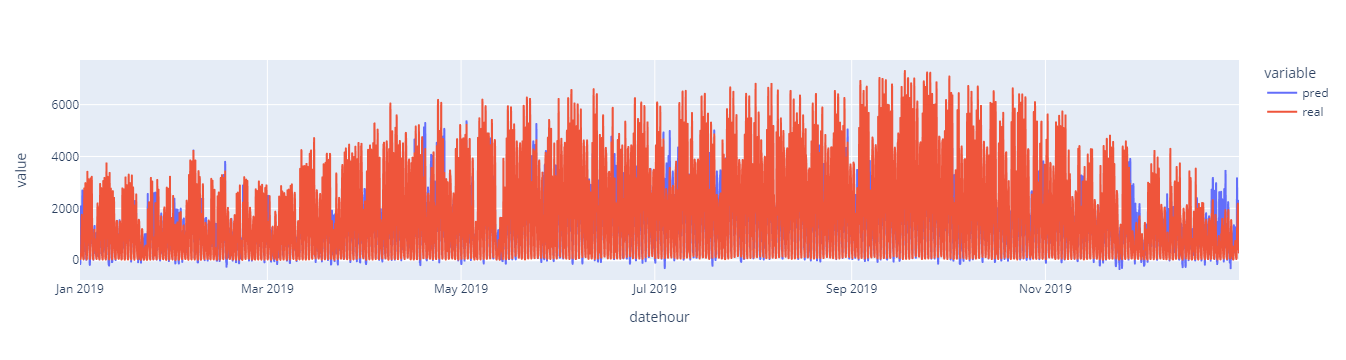

In [381]:
px.line(
    pd.DataFrame({
        "pred": y_pred,
        "real": y_test
    })
)

In [382]:
print_metrics(y_test, y_pred)

MSE: 351239.46374613466
RMSE: 592.654590588932
MAPE: 0.5903114419364877
MedianAE: 245.13165283203125
MeanAE: 401.8154226551453


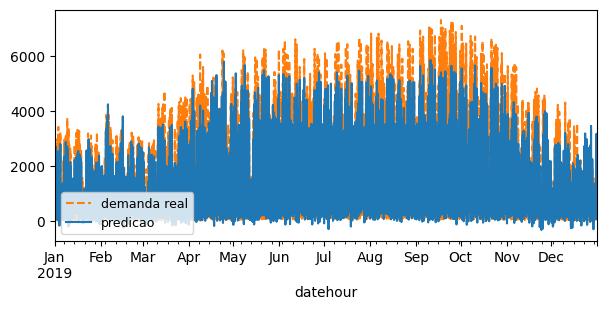

In [383]:
y_test.iloc[:].rename("demanda real").plot(style='--', color='tab:orange', figsize=(7,3), legend=True)
y_pred.iloc[:].rename("predicao").plot(color='tab:blue', figsize=(7,3), legend=True)

plt.legend(loc="lower left", prop={'size': 9})
plt.savefig("Imagens/pred_xgboost_total.png")

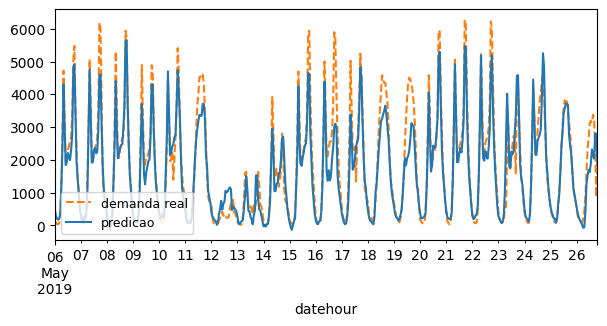

In [384]:
y_test.iloc[3000:3500].rename("demanda real").plot(style='--', color='tab:orange', figsize=(7,3), legend=True)
y_pred.iloc[3000:3500].rename("predicao").plot(color='tab:blue', figsize=(7,3), legend=True)

plt.legend(loc="lower left", prop={'size': 9})
plt.savefig("Imagens/pred_xgboost_window.png")

# Métricas